In [66]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [65]:
freq, inten = np.genfromtxt("./cyclic-c3h3+.tsv").T
freq_exp, counts = np.genfromtxt("./data.dat")[:, 0:2].T
factor = counts.max()/inten.max()
counts = counts/factor

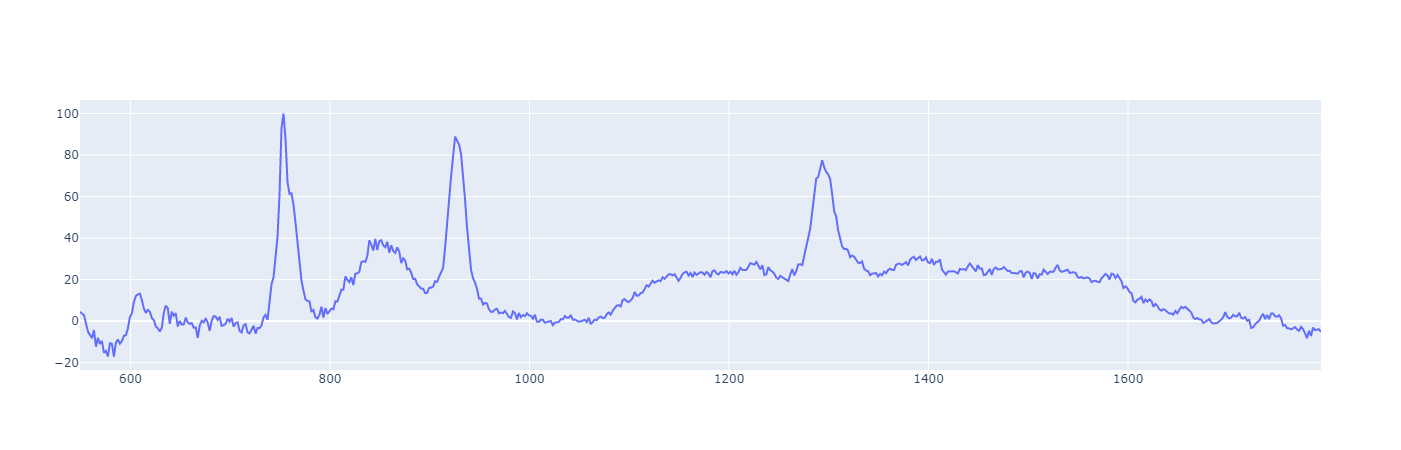

In [26]:
trace1 = {"x":freq_exp, "y": counts}
trace2 = {"x":freq_exp, "y": counts}
iplot([trace1])

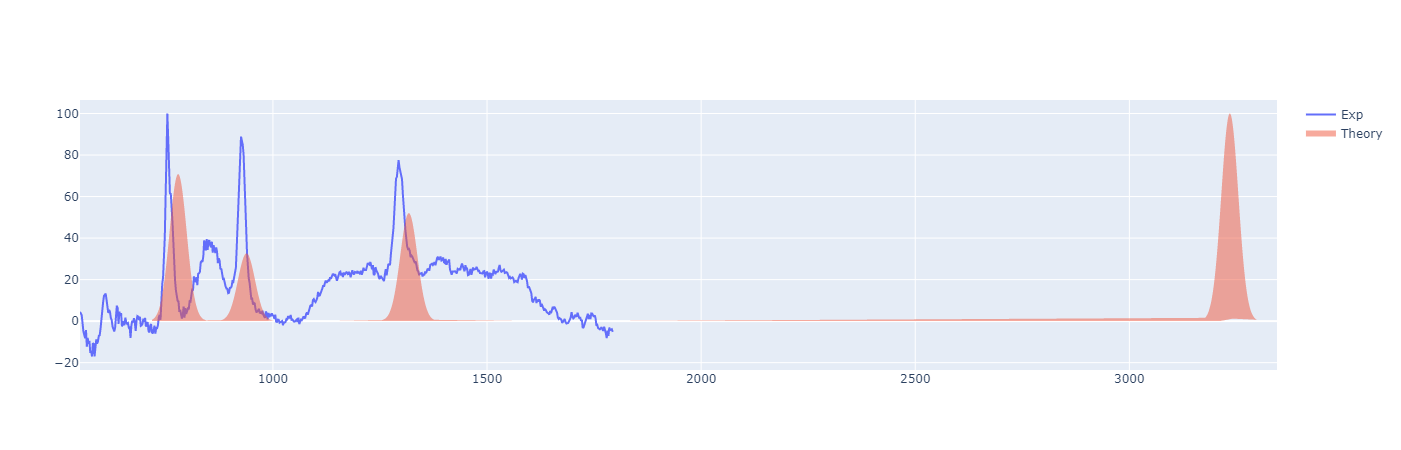

In [61]:
def gaussian(x, A, sig, center):
    return A*np.exp(-0.5*((x-center)/sig)**2)

theory_x, theory_y = [], []
for center, A in zip(freq, inten):
    
    sig = 20
    size = 1000

    x = np.random.normal(center, sig, size)
    x = np.sort(x, axis=0)

    y = gaussian(x, A, sig, center)
    
    theory_x = np.append(theory_x, x)
    theory_y = np.append(theory_y, y)
    
trace1 = {"x":freq_exp, "y": counts, "name":"Exp"}
trace2 = {"x":theory_x, "y":theory_y, "name":"Theory", "fill":"tozeroy", "mode":"none"}
iplot([trace1, trace2])

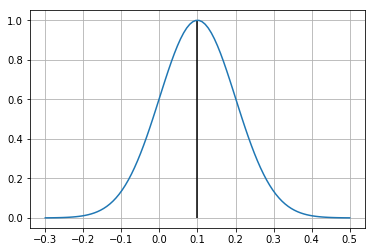

In [134]:
sig = 0.1
center = 0.1
s1 = center - (4*sig)
s2 = center + (4*sig)

x = np.linspace(s1, s2, 100)
plt.plot(x, gaussian(x, A=1, sig=sig, center=center))
plt.vlines(x=center, ymin=0, ymax=1)
plt.grid()

In [109]:
0.5-(0.8*0.5)

0.09999999999999998